<a href="https://colab.research.google.com/github/distinctkemi/Medical-Appointment/blob/main/investigate_a_dataset_template_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Project 1: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#conclusions">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  The aim of this project is to investigate why 30% of patients miss their scheduled appointments. The dataset is gotten from [kaggle] (https://www.kaggle.com/datasets/joniarroba/noshowappointments) and it consist of 110527 medical appointments and 14 associated variables (features). Thetarget column is the show-up or no-show to the appointment.
The  features/columns are described thus:
- PatientId: Identification of a patient
-  AppointmentID: Identification of each appointment
-  Gender: Male or Female
-  DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor.
-  DataAgendamento: The day someone called or registered the appointment, before appointment.
-  Age: Patient's age
-  Neighbourhood: This indicates the location of the hospital..
-  Scholarship: True or False column, showing if a patient gets benefit from Bolsa Família, provided financial aid to poor Brazilian families
- Hypertension: If a patient is hypertensive or not (True/Fase)
- Diabetes: Shows if a patient is diabetic or not (True/False)
- Alcoholism: Shows if a patient is alcholic or not (True/False)
- Handicap: If a patient is an handicap or not (True/False)
- SMS_received: Number of messages sent to patient 
- No_show: If a patient showed for their appointment or not,  it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up



>**Questions that can could be asked from the dataset**
- Does a patient's age effect whether or not they show up for their appointment?
- Which gender is more likely to miss an appointment, men or women?
- Does a patient's medical condition, such as alcoholism, diabetes, or hypertension, influence whether they will or won't skip their appointment?


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


In [ ]:
#Loading the dataset
df = pd.read_csv("Noshow.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> After importing the dataset, it became apparent that certain column names were misspelt, such as "handcap" and "hipertension," and that the column names were inconsistent overall. In addition, the "No-show" column name had an operator (-). For easier analysis, the column names need to be modified and made uniform.

 Let's check the size of our dataset

In [ ]:
#Checking the size of the data
df.shape
print('There are', df.shape[0] , 'patients',  'and', df.shape[1],  'features in the noshow dataset')

There are 110527 patients and 14 features in the noshow dataset


In [ ]:
#Checking the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>The above code result indicates the data type of each column, and it can be observed that the two datetime columns  which are scheduled day and appointment are not in the correct data types and would be changed to the right data type incase any of the columns will be used for any analysis. This result also showed that there are no missing values in the dataset because the count for each column equals the number of patients/rows in the dataset.

In [ ]:
#Confirming that there are no missing values in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> As expected, there are no missing values in the dataset according to the code above

Creating a function that changes the names of all the columns in dataset to lowercase 

In [ ]:
#Creating a function that coverts the column names to lowercase for easy analysis 
def renaming(df):
    """
    The function is used to change all the names of the columns in a dataset to lowercase
    for easy analysis. 
    
    It takes one argument which is the name of the dataset to use the function on.
    """
    df.columns= df.columns.str.lower()
    return df

Creating a function that changes the minus - operator to underscore in the column names

In [ ]:
#Creating a function that replaces minus ''-'' sign with underscore '_' because "-" is  an operator ans not ideal for analysis
def replacing(df):
    df.columns = df.columns.str.replace('-', '_')
    return df

The following code below changes all the column names to lower case  and replaces the minus - operator in the column names using the functions(replacing, renaming) created above.

In [ ]:
#making use of the function on the dataset and confirming the changes in the column names
df = renaming(df)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> All names of the column has been changed to lowercase after applying the function created.

In [ ]:
#Replacing any minus sign (-) present in the names of the column to underscore (_)b
df = replacing(df)

#Viewing the dataset again to be sure the operator sign has been replaced
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Only the No show had an operator sign and it has been successfully changed after applying the function.

In [ ]:
#Renaming columns that are wrongly spelt like the hipertension and handcap 
cols = {}
df.rename(columns = {'hipertension': 'hypertension', 'handcap': 'handicap'}, inplace = True)

#Confirming if the name has been changed successfully
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


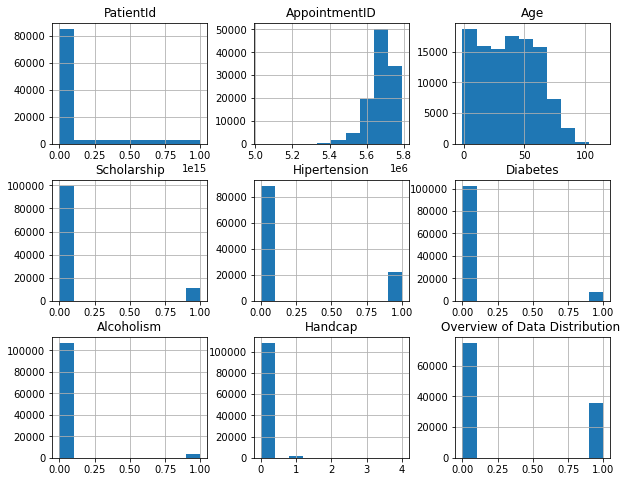

In [ ]:
#An over view of the data
df.hist(figsize = (10,8))
plt.title("Overview of Data Distribution ");

> In the preceding plot, which only displayed plots for the number columns, it can be seen that the age group is skewed to the right and that many of the patients are handicapped, diabetic, alcoholic, and hypertensive. The majority of them also received an SMS reminding them of their appointment.


In [ ]:
#Checking the number of yes in the no show column which shows the number of patients that missed their appointment
#and the number of no in the column which shows the number of patients that did not miss their appointment
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

> There are 88208 of patients who showed up for their appointment and 22319 who did not show according to the result above.

No handles with labels found to put in legend.


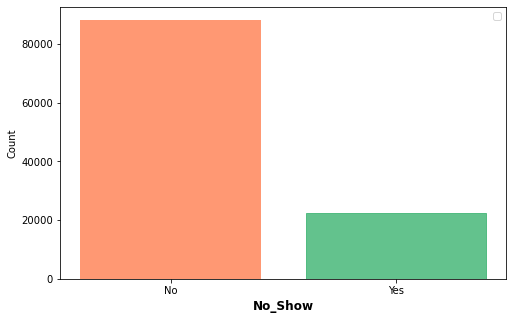

In [ ]:
#Visualising the No show column distribution
noshow = df['no_show'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(8,5))

barplot = plt.bar(noshow.index, noshow, color = 'coral', alpha = 0.8)
barplot[1].set_color('mediumseagreen')
plt.ylabel('Count')
plt.xlabel('No_Show', fontsize = 12, weight = 'bold')
plt.legend()
plt.show()

> The result above shows that larger percentage of the patients showed for their appointment

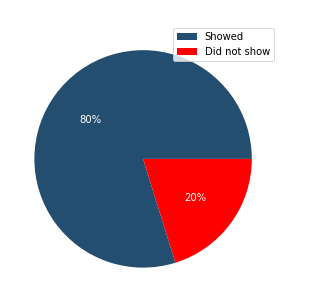

In [ ]:
#Visualizing the percentage of patients that showed and did not show for their appointments with piechart
f=plt.figure(figsize=(8,5))
plt.pie(df['no_show'].value_counts().values,labels=['Showed','Did not show'],autopct='%.0f%%', textprops={'color':"w"},colors=['#234E70', 'r'])
plt.title('Patient that showed and did not show', color = 'white')
plt.legend()
plt.show()

> The above chart shows that 80% of the patients showed for their appointment while 20% did not.

In [ ]:
#Converting the no-show column to a numerical column for easy analysis 
df['no_show'] = df['no_show'].map(dict(Yes=1, No=0))

> The above plot shows that there are majority of the patients are 

In [ ]:
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


>The above statistics summary only showed the numerical columns, and it also demonstrated that the age column contains an outlier because the minimum value in age displays a value that is impossible (-1). It also demonstrated that the age column has a high standard deviation when compared to other columns, drawing attention to the age column. The age column will bbe grouped into 4 categories for better data exploratory; children, teenages, adults and old adults respectively. Also the summary statistics shows that the middle age in the data os 37.


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


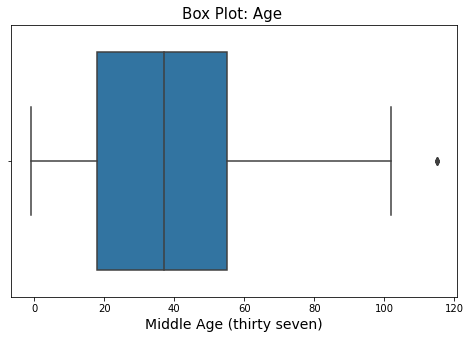

In [ ]:
#Visualising the age column with boxplot to check for outliers
fig = plt.figure(figsize=(8,5))
sns.boxplot(df['age'])
plt.title('Box Plot: Age ', fontsize=15)
plt.xlabel('Middle Age (thirty seven)', fontsize=14)
plt.show();

>As expected, there is an outlier in the age column from the boxplot above. This plot also shows that the age column is skewed to the right. The best way to deal with the outlier is to drop the column that contained the negative value as it is impossible to have a negative number

In [ ]:
#Checking the row with the outlier
df.loc[df['age']<0]

> Row 99832 in the dataset has the negative value for age as it can be seen that the age in this row is -1 and would therefore be dropped as part of  

The entry with the negative age will be removed as part of a decent data cleaning process because it is impossible to have a negative age, making it an anomaly in our dataset.

In [ ]:
#Dropping the row with the outlier
df.drop(df.loc[df['age']<0].index,axis=0,inplace=True)

#Confirming that the row has been deleted successfully
df.loc[df['age']<0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_bracket


> The row with the negative age has been successfully droped uaing the code above.

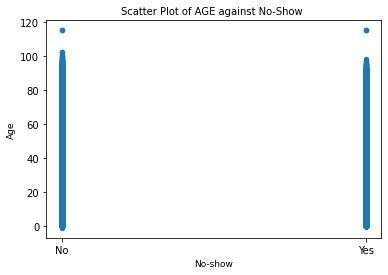

In [ ]:
#Scatter plot of the age column against the no-show coloumn
df.plot(x = 'no_show', y = 'age', kind = 'scatter')
plt.title('Scatter Plot of AGE against No-Show ', fontsize=10)
plt.xlabel('No-show', fontsize=9)
plt.ylabel('Age', fontsize = 9)
plt.show();

> A new column was created to group each patients under different age brackets in order to explore the data adequately and understand if a patient's age bracket would have any correlation with them not showing up for their appointment or not

In [ ]:
#Checking for the categories of the handicap column
df['handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

> The code above shows that there are 4 levels in the handicap but no enough details to further explore the column.

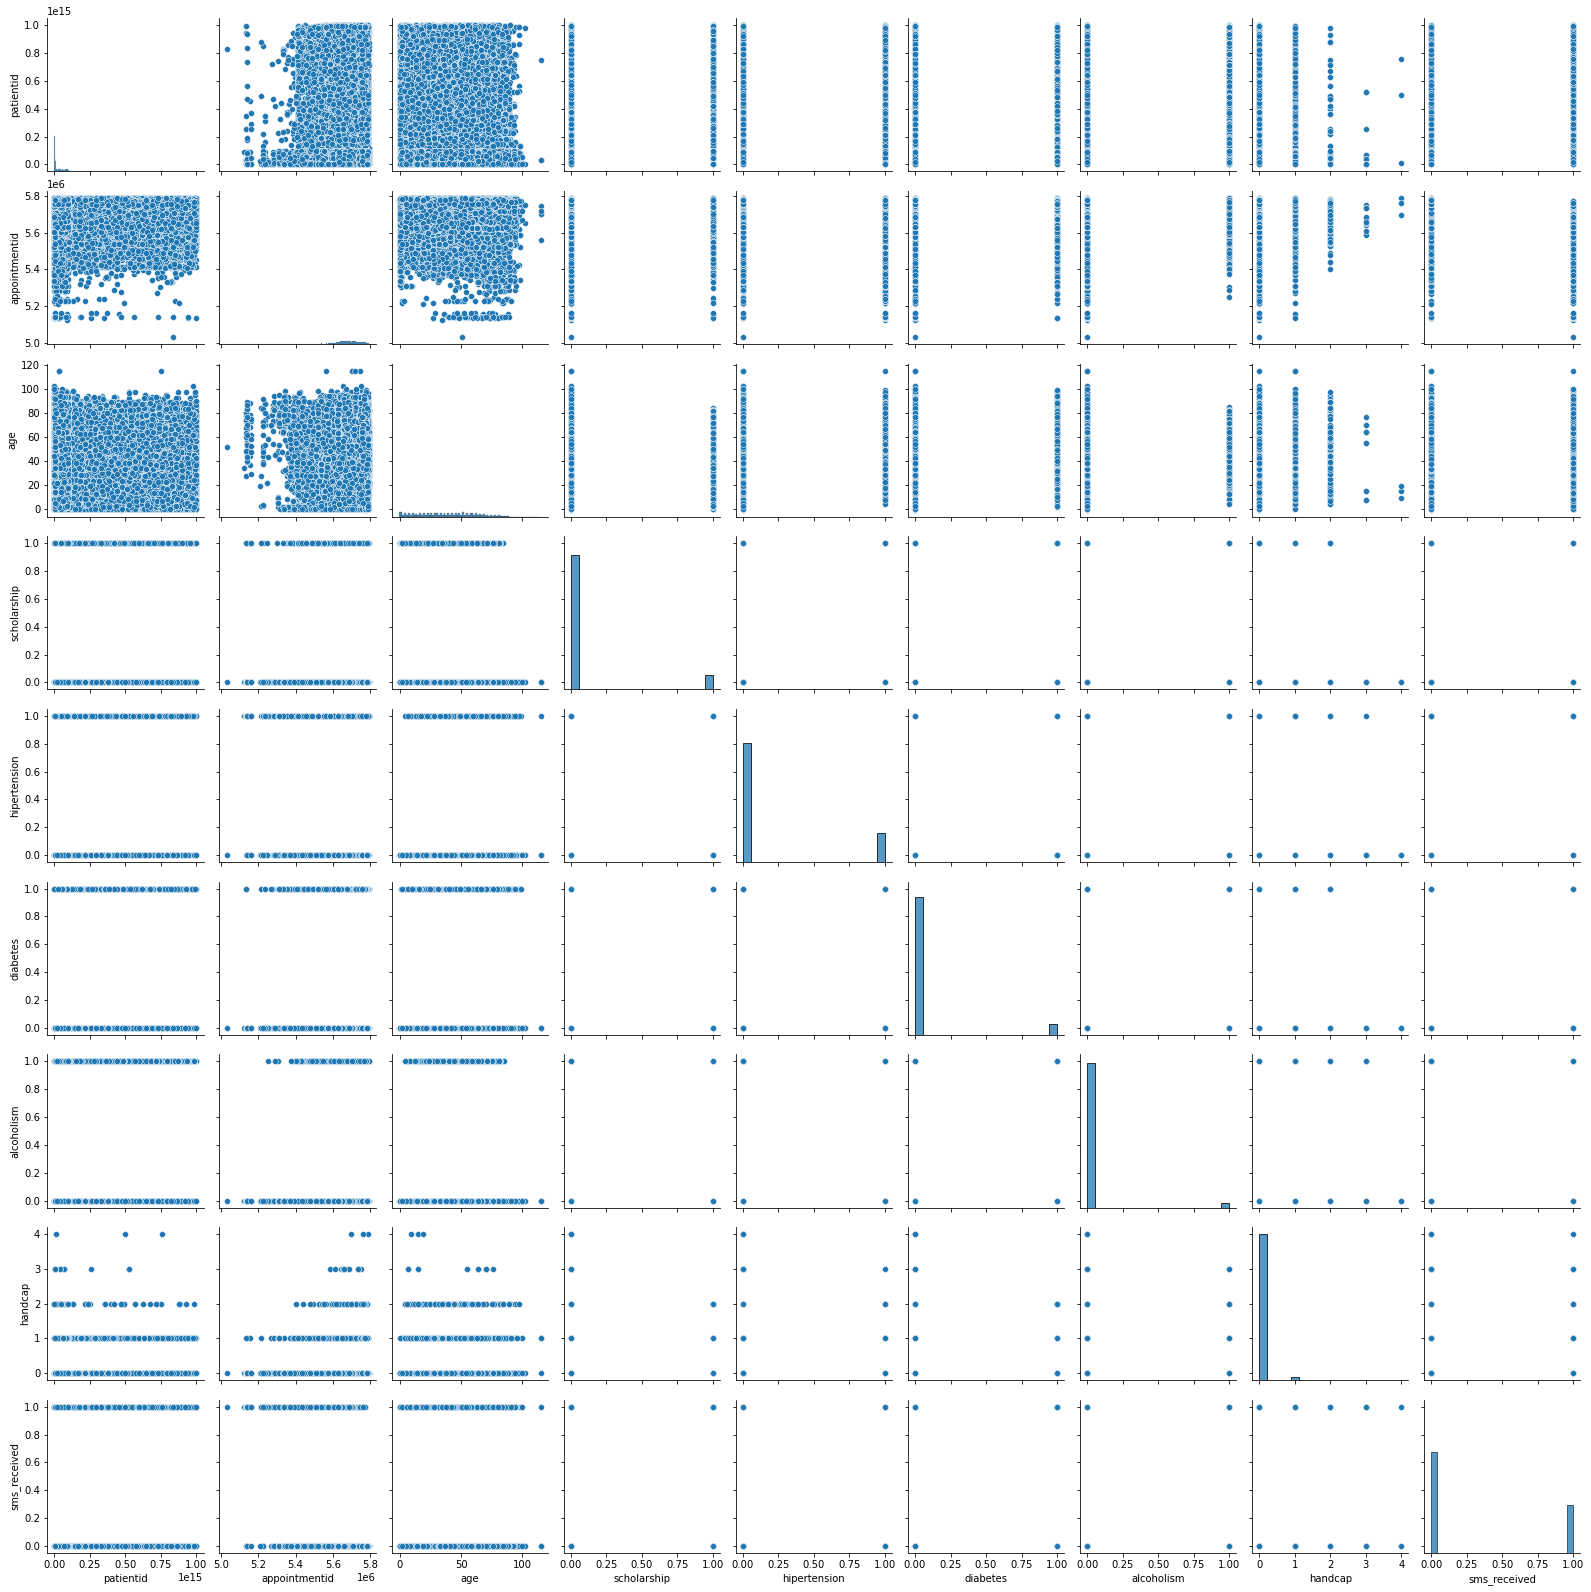

In [ ]:
#Pair plots of all the columns in the data to check for any relationship between the columns
plots = sns.pairplot(df)

>Most of the data columns in the plot above are categorical and lack a linear relationship.

### Research Question 1(Does a patient's age effect whether or not they show up for their appointment?)

It would be useful to divide the patients into different age groups as part of the analysis on the age column to determine which group of patients missed their appointments the most. To that end, a function will be written for the grouping, as shown below.

In [ ]:
#Writing a function that groups the different ages into  age bracket s
def ages(a):
    if a > 0 & a<= 12:
        a='Child'
    elif a > 12 & a <=16:
        a= 'Teenager'
    elif a >16 & a <=65:
        a ='Adult'
    else:
        a ='Old age'
    return a

Now, let's apply the function created above on the age column

In [ ]:
#Dividing the patients into different age groups using the formula created above
df['age_brack'] = df['age'].apply(ages)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_bracket,age_brack
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,old age,Children
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,old age,Children
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,old age,Children
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,children,Children
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,old age,Children


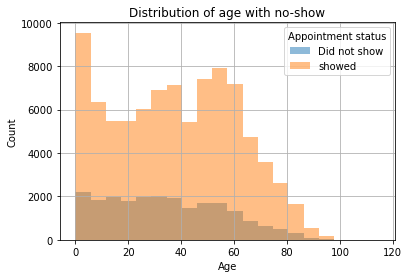

In [ ]:
yes = df['no_show'] == True
no = df['no_show'] == False
df.age[yes].mean()
df.age[no].mean()

df.age[yes].hist(alpha=0.5, bins=20, label='Did not show')
df.age[no].hist(alpha=0.5, bins=20, label='showed')
plt.title('Distribution of age with no-show')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title = 'Appointment status');

> In comparison to other age brackets, the plot above demonstrates that the older a patient, the lower they miss their appointments and children has high number of missed appointments.

Text(0, 0.5, 'number of patient  ')

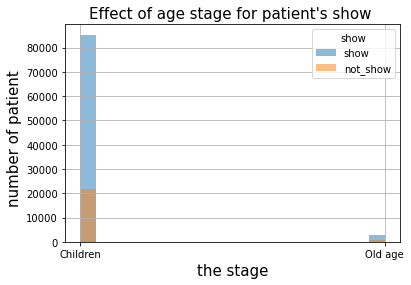

In [ ]:
f,ax=plt.subplots()
df.age_brack[show].hist(alpha=0.5, bins=20, label='show')
df.age_brack[not_show].hist(alpha=0.5, bins=20, label='not_show')
plt.title('Effect of age stage for patient\'s show ',fontsize=15)
plt.legend(title='show')
plt.xlabel('the stage',fontsize=15)
plt.ylabel('number of patient  ',fontsize=15)

> The result above shows that patients under the children age bracket missed appointment more than other age brackets. 

### Research Question 2(Which gender is more likely to miss an appointment, men or women?)

Let's start by checking the number males and females in the dataset

In [ ]:
#Checking the number of males and females in the dataset
gender_counts = df['gender'].value_counts()
print('There are ', gender_counts[0], 'number of females and ', gender_counts[1], 'number of males')

NameError: ignored

In [ ]:
#Grouping the data by gender with respect to the no show column to know the distribution of each gender and showing up for  
#their appointment
gender_count = df.groupby("gender")["no_show"].value_counts()
print(gender_count)

> According to the results above, 30962 out of 38687 males and 57245 out of 71839 ladies did not miss their appointments.

In [ ]:
#Visualising the gender distribution in the data
f,ax=plt.subplots()
ax.bar(df['gender'].value_counts().index[0],df['gender'].value_counts().values[0],label='Females')
ax.bar(df['gender'].value_counts().index[1],df['gender'].value_counts().values[1],label='males')
plt.title('Gender Distribution ',fontsize=20)
plt.legend(title = 'Gender')
plt.xlabel('Gender')
plt.ylabel('Number of the patients')
plt.show()

> As observed in the previous code,there are many females patients than male.

In [ ]:
#Visualizing the percentage of female and male patients 
f=plt.figure(figsize=(8,5))
plt.pie(df['gender'].value_counts().values,labels=['Female','Male'],autopct='%.0f%%', textprops={'color':"w"},colors=['#234E70', 'r'])
plt.title('Gender Distribution', color = 'white')
plt.legend(title = 'Gender')
plt.show()

> The pie chart above illustrates that there are 65% of females in the dataset and 35% male.

In [ ]:
#Visualising the gender column  with respect to them showing for the appointment or not
plt.subplot(1,1,1)
gender=df['gender'].map({'F':'Female','M':'Male'})
sns.countplot(gender, data=df,hue='no_show')
plt.title('Effect of hypertension on patient\'s appointmet effect to patient showing for appointment',fontsize=12)
plt.ylabel('Number of patients')
plt.legend(title='Show',labels=['Showed','Didn\'t show'])
plt.show()

> According to the code above, more people of both genders showed up for their appointments than did not.

### Research Question 3 (Does a patient's medical condition, such as alcoholism, diabetes, or hypertension, influence whether they will or won't skip their appointment?)

Starting the exploration with the hypertension column

In [ ]:
#CHhecking for the number of hypertensive and non-hypertensive patients
hyper = df['hypertension'].value_counts()
print('There are ', hyper[1], 'hypertensive patients, and ', hyper[0], 'non hypertensive patients')

There are  21801 hypertensive patients, and  88725 non hypertensive patients


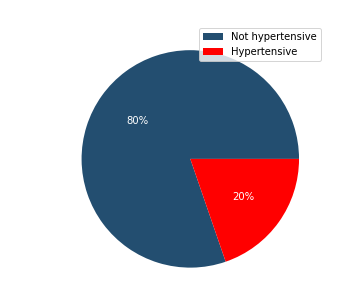

In [ ]:
#Visualizing the percentage of patients that are hypertensive or not
f=plt.figure(figsize=(8,5))
plt.pie(df['hypertension'].value_counts().values,labels=['Not hypertensive','Hypertensive'],autopct='%.0f%%', textprops={'color':"w"},colors=['#234E70', 'r'])
plt.title('Hypertensive patients or not', color = 'white')
plt.legend()
plt.show()

> Only 20% of the patients in the dataset is hypertensive.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


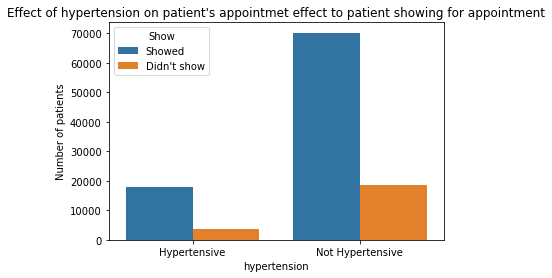

In [ ]:
#Visualising the distribution of hypertensive patients with missing appointment
plt.subplot(1,1,1)
hyp=df['hypertension'].map({1:'Hypertensive',0:'Not Hypertensive'})
sns.countplot(hyp, data=df,hue='no_show')
plt.title('Effect of hypertension on patient\'s appointmet effect to patient showing for appointment',fontsize=12)
plt.ylabel('Number of patients')
plt.legend(title='Show',labels=['Showed','Didn\'t show'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

> About 1900 of the 21801 hypertensive patients showed up for their appointments. Because a patient with hypertension needs regular medical checkups and cannot afford to miss an appointment because doing so would be harmful to their health, it is predicted that a patient with hypertension is unlikely to skip their appointment.


Analysing Diabetic Column

In [ ]:
#Checking for number of diabetic and non-diabetic patients in the dataset
diab = df['diabetes'].value_counts()
print('There are ', diab[1], 'diabetic patients, and ', diab[0], 'non diabetic patients')

There are  7943 diabetic patients, and  102583 non diabetic patients


Checking the percentage of diabetic and non diabetic patients

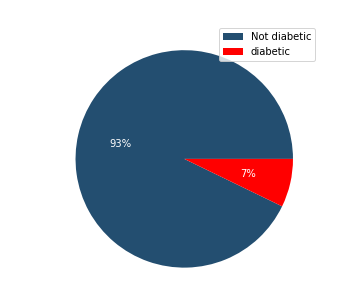

In [ ]:
#Visualizing the percentage of patients that are diabetic or not
f=plt.figure(figsize=(8,5))
plt.pie(df['diabetes'].value_counts().values,labels=['Not diabetic','diabetic'],autopct='%.0f%%', textprops={'color':"w"},colors=['#234E70', 'r'])
plt.title('Diabetic patients or not', color = 'white')
plt.legend()
plt.show()

> The piechart above shows that only 7% of the patients in the diabetes column are diabetic.

Let's visualise the distribution of diabetic patients according to their attendance at appointments.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


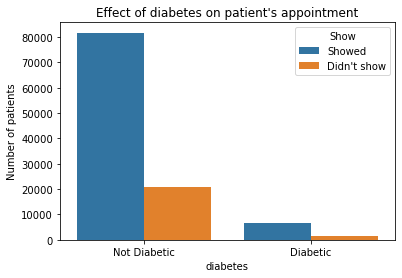

In [ ]:
#Visualising the diabetic patients and the relationship with missing appointment
plt.subplot(1,1,1)
dia=df['diabetes'].map({1:'Diabetic',0:'Not Diabetic'})
sns.countplot(dia, data=df,hue='no_show')
plt.title('Effect of diabetes on patient\'s appointment',fontsize=12)
plt.ylabel('Number of patients')
plt.legend(title='Show',labels=['Showed','Didn\'t show'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

> The plot above illustrate that most diabetic patients showed up for their appointments, and only 1% of the diabetic patients did not show for their appointments according to the plot.

Analysing Alcholism Column

In [ ]:
#Counting number of alcoholic patients and non-alcoholic patients
alch = df['alcoholism'].value_counts()
print('There are ', alch[1], 'alcoholic patients, and ', alch[0], 'non alcoholic patients')


There are  3360 alcoholic patients, and  107166 non alcoholic patients


Checking for the percebtage of alcholic patients in the dataset

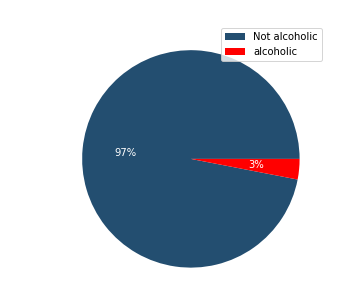

In [ ]:
#Visualizing the percentage of patients that are alcoholic or not
f=plt.figure(figsize=(8,5))
plt.pie(df['alcoholism'].value_counts().values,labels=['Not alcoholic','alcoholic'],autopct='%.0f%%', textprops={'color':"w"},colors=['#234E70', 'r'])
plt.title('Alcholic patients & Non-Alcholic Patients', color = 'white')
plt.legend()
plt.show()

> The piechart above shows that only 3% of the patients in the alcoholism column are alcoholic, which seems not be very significant

Let's visualise the distribution of alcholic patients according to their attendance at appointments.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


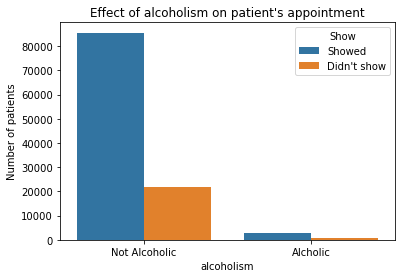

In [ ]:
#Visualising the diabetic patients and the relationship with missing appointment
plt.subplot(1,1,1)
alcohol =df['alcoholism'].map({1:'Alcholic',0:'Not Alcoholic'})
sns.countplot(alcohol, data=df,hue='no_show')
plt.title('Effect of alcoholism on patient\'s appointment',fontsize=12)
plt.ylabel('Number of patients')
plt.legend(title='Show',labels=['Showed','Didn\'t show'])
plt.show()

> The ratio of the number of alcoholic patients that showed up for appointment to those that did not show up for their appointment is about 2:1. The plot above depict that alcoholic patients showed up for their appointments.

<a id='limitations'></a>
## Limitations

>The following constraints were discovered after thorough data exploration:

>1. Given that there are four categories in the handicap column but no explicit definition of what each category entails, the description is insufficient.
>2. If information such as the time the text message was sent to the patient had been provided, it could have been easier to determine if it was delivered early enough to remind the patient about their appointment and to gauge the effectiveness of sending texts.

<a id='conclusions'></a>
## Conclusions

>It has been observed that patients with underlying health conditions such as diabetes and hypertension are less likely to miss their appointments which is only logical. It has also been observed that tennagers have a high tendency to miss their appointments. Patients' gender does not always determine whether or not they will attend their appointment as both females and males mostly showed up for their appointments.